# 2. Model Training and Tuning
##  DTSC 691 Project Submission
## Yurian Falls 




In [2]:
from sklearn.metrics import (f1_score, precision_score, recall_score)
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import warnings
import cv2
import os
warnings.filterwarnings('always')  # "error", "ignore"

In [3]:
np.random.seed(42) # setting up random seeds for the notebook
tf.random.set_seed(42)

In [4]:
tf.__version__

'2.8.0'

In [5]:
keras.__version__

'2.8.0'

# a. Data splitting into train, test and validation sets

 As I'm working with images on labeled folders, I found a solution that allows me to divide the folders into Training Testing and Validation: SplitFolders Package   

In [8]:
import splitfolders   # Referenced in report https://pypi.org/project/split-folders/

In [10]:
splitfolders.ratio('Data_original_jpeg', output="output", seed=1337, ratio=(.6, 0.2,0.2)) 

Copying files: 7649 files [00:10, 697.86 files/s]


In [6]:
img = image.load_img('output/train/Acceptable_JPEG/IM-0001-0021.jpg')

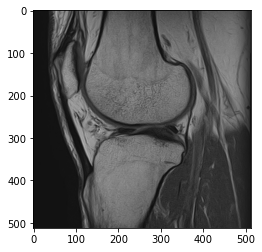

In [7]:
plt.imshow(img)

In [13]:
cv2.imread('output/train/Acceptable_JPEG/IM-0001-0021.jpg')

array([[[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [42, 42, 42],
        [44, 44, 44],
        [15, 15, 15]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [42, 42, 42],
        [44, 44, 44],
        [15, 15, 15]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [43, 43, 43],
        [44, 44, 44],
        [15, 15, 15]],

       ...,

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [26, 26, 26],
        [26, 26, 26],
        [17, 17, 17]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [26, 26, 26],
        [26, 26, 26],
        [16, 16, 16]],

       [[18, 18, 18],
        [18, 18, 18],
        [18, 18, 18],
        ...,
        [27, 27, 27],
        [25, 25, 25],
        [15, 15, 15]]], dtype=uint8)

In [14]:
cv2.imread('output/train/Acceptable_JPEG/IM-0001-0021.jpg').shape

(512, 512, 3)

## a1. Rescaling and Preprocessing

In [83]:
train = ImageDataGenerator(rescale = 1/255)             # Data is rescaled
validation = ImageDataGenerator(rescale = 1/255)

In [84]:
train_dataset = train.flow_from_directory('output/train/',                     # Data is loaded from the folders
                                         target_size = (512, 512),             # Target size and batch size is set
                                         batch_size = 100, shuffle = True, 
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory('output/val/',
                                         target_size = (512, 512),
                                         batch_size = 100, shuffle = True, 
                                         class_mode = 'binary')


Found 4588 images belonging to 2 classes.
Found 1529 images belonging to 2 classes.


In [21]:
labels = train_dataset.class_indices        # These are the labels, the folder names
labels

{'Acceptable_JPEG': 0, 'Not_Acceptable_JPEG': 1}

In [22]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

## a2. Preparing the test dataset for testing later

In [14]:
testing = ImageDataGenerator(rescale = 1/255)  # rescaling the testing data

In [15]:
test_dataset = testing.flow_from_directory('output/test/',            # setting the target size and batch size
                                         target_size = (512, 512),
                                         batch_size = 100, shuffle = False,
                                         class_mode = 'binary')

Found 1532 images belonging to 2 classes.


In [16]:
test_dataset.class_indices

{'Acceptable_JPEG': 0, 'Not_Acceptable_JPEG': 1}

# b. Model 1 

## b1. Design and Training

Please note I have renamed the models for the report and they have been separated into Model 1, 2 and model (final model), and this is not reflected in the model names used int the cells below

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape =(512,512,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ###
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ###
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ###
                                    tf.keras.layers.Flatten(),
                                    ###
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ###
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [14]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

In [17]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 50, 
                     epochs = 20,
                     validation_data = validation_dataset)

Epoch 1/20
50/50 [==============================] - 325s 7s/step - loss: 0.4319 - accuracy: 0.8144 - val_loss: 0.3265 - val_accuracy: 0.8534
Epoch 2/20
50/50 [==============================] - 305s 6s/step - loss: 0.3315 - accuracy: 0.8560 - val_loss: 0.2795 - val_accuracy: 0.8822
Epoch 3/20
50/50 [==============================] - 306s 6s/step - loss: 0.2333 - accuracy: 0.9032 - val_loss: 0.2559 - val_accuracy: 0.8861
Epoch 4/20
50/50 [==============================] - 313s 6s/step - loss: 0.2721 - accuracy: 0.9005 - val_loss: 0.2277 - val_accuracy: 0.9031
Epoch 5/20
50/50 [==============================] - 338s 7s/step - loss: 0.1605 - accuracy: 0.9392 - val_loss: 0.2001 - val_accuracy: 0.9149
Epoch 6/20
50/50 [==============================] - 346s 7s/step - loss: 0.1773 - accuracy: 0.9429 - val_loss: 0.1941 - val_accuracy: 0.9228
Epoch 7/20
50/50 [==============================] - 376s 8s/step - loss: 0.0895 - accuracy: 0.9688 - val_loss: 0.1377 - val_accuracy: 0.9463
Epoch 8/20
50

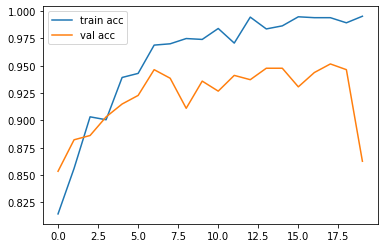

In [18]:
# Plotting model metrics: Training Accuracy and Validation Accuracy
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

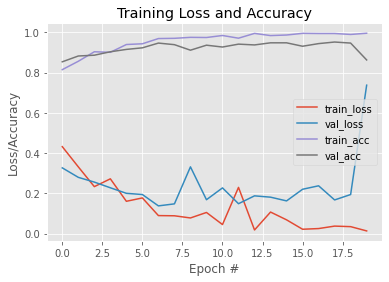

In [40]:
# plotting metrics: training / validation loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), model_fit.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), model_fit.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), model_fit.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), model_fit.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("original_model")

In [35]:
#model.save('model.h5') I already saved the model so I will comment this out

## b2. Model 1 Metric Testing with Test Dataset

In [5]:
model_1 = keras.models.load_model('model_1.h5')

In [59]:
model_1.layers # Model layers list

In [34]:
model_1.summary() # This is the summary of model 1, to verify we ahave the right model file

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 508, 510, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 254, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 253, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0

In [8]:
model_1.metrics_names  # Model metrics

['loss', 'accuracy']

In [12]:
metrics_test_testing_1 = model_1.evaluate(test_dataset)     # evaluating the metrics on the test dataset

16/16 [==============================] - 56s 3s/step - loss: 0.5133 - accuracy: 0.8969


In [13]:
metrics_test_testing_1  # This is the loss and accuracy of model 1 on the test dataset

[0.5132677555084229, 0.8968668580055237]

## b3. Model 1 Confusion Matrix and Classification Report

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model_1.predict(test_dataset)
y_pred = [1 * (x[0]>=0.5) for x in Y_pred]
conf_mtx = confusion_matrix(test_dataset.classes, y_pred)
print(conf_mtx)
print('Classification Report')
target_names = ['Not_acceptable', 'Acceptable']
print(classification_report(test_dataset.classes, y_pred, 
target_names=target_names))

[[760 141]
 [ 17 614]]
Classification Report
                precision    recall  f1-score   support

Not_acceptable       0.98      0.84      0.91       901
    Acceptable       0.81      0.97      0.89       631

      accuracy                           0.90      1532
     macro avg       0.90      0.91      0.90      1532
  weighted avg       0.91      0.90      0.90      1532



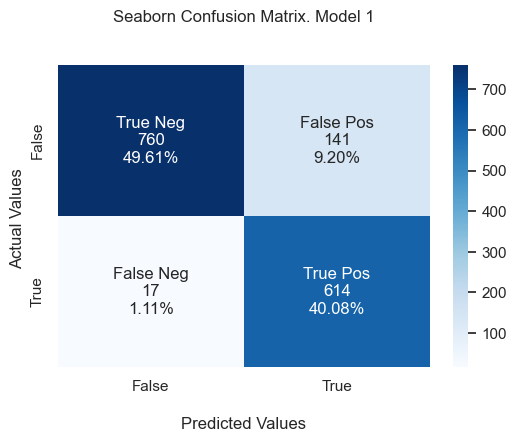

In [19]:
# Plotting the confussion matrix 
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mtx.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mtx.flatten()/np.sum(conf_mtx)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mtx, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix. Model 1\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# labels 
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

Acceptable: 901 images  
Not_Acceptable: 631 images  
Total Images: 1532  
  
Accuracy: How often is the classifier correct?  
- (TP+TN)/total = (614+760)/1532 = 0.896 (90%)
  
Misclassification Rate: How often is it wrong?  
- (FP+FN)/total = (141+17)/1532 = 0.10 (10%)   
- equivalent to 1 minus Accuracy  
- also known as "Error Rate"  
  
True Positive Rate: When it's actually yes, how often does it predict yes?  
- TP/actual yes = 614/631 = 0.97 (97%)  
- also known as "Sensitivity" or "Recall"  
  
False Positive Rate: When it's actually no, how often does it predict yes?  
- FP/actual no = 141/901 = 0.156 (16%)  
  
True Negative Rate: When it's actually no, how often does it predict no?  
- TN/actual no = 760/901 = 0.84 (84%)  
- equivalent to 1 minus False Positive Rate  
- also known as "Specificity"  
  
Precision: When it predicts yes, how often is it correct?  
- TP/predicted yes = 614/755 = 0.81 (81%)  
  
Prevalence: How often does the yes condition actually occur in our sample?  
- actual yes/total = 755/1532 = 0.49 (49%)  
  
[Data School] (https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

# c. Model 2

## c1. Model improvement using Keras with callbacks, early stopping

Please note I have renamed the models for the report and they have been separated into Model 1, 2 and model (final model), and this is not reflected in the model names used int the cells below

In [ ]:
keras.backend.clear_session() # CLearing the prior keras session

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape =(512,512,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ###
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ###
                                    tf.keras.layers.Conv2D(64, (3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ###                                   
                                    tf.keras.layers.Conv2D(128, (3,3),activation = 'relu'), # added another layer
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ###
                                    tf.keras.layers.Conv2D(320, (3,3),activation = 'relu'), # added another layer
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ###
                                    tf.keras.layers.Flatten(),
                                    ###
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ###
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                   ])

In [20]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("model.h5", save_best_only = True)

history = model.fit(train_dataset,
                     steps_per_epoch = 40, 
                     epochs = 30,
                     validation_data = validation_dataset, callbacks = [checkpoint_cb])

model = keras.models.load_model("model.h5") # save the best model, overwritting the first one, named also model.h5

Epoch 1/30
40/40 [==============================] - 529s 13s/step - loss: 0.5372 - accuracy: 0.7467 - val_loss: 0.4045 - val_accuracy: 0.8089
Epoch 2/30
40/40 [==============================] - 516s 13s/step - loss: 0.4013 - accuracy: 0.8232 - val_loss: 0.3635 - val_accuracy: 0.8403
Epoch 3/30
40/40 [==============================] - 519s 13s/step - loss: 0.3229 - accuracy: 0.8562 - val_loss: 0.2770 - val_accuracy: 0.8796
Epoch 4/30
40/40 [==============================] - 567s 14s/step - loss: 0.3583 - accuracy: 0.8777 - val_loss: 0.2393 - val_accuracy: 0.8914
Epoch 5/30
40/40 [==============================] - 527s 13s/step - loss: 0.2129 - accuracy: 0.9099 - val_loss: 0.2059 - val_accuracy: 0.9162
Epoch 6/30
40/40 [==============================] - 516s 13s/step - loss: 0.1740 - accuracy: 0.9243 - val_loss: 0.1649 - val_accuracy: 0.9398
Epoch 7/30
40/40 [==============================] - 505s 13s/step - loss: 0.1613 - accuracy: 0.9423 - val_loss: 0.2623 - val_accuracy: 0.8966
Epoch 

In [ ]:
# Plotting the model metrics 
plt.style.use("ggplot")
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.savefig("final_model")
plt.title("Training and Validation Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.show()

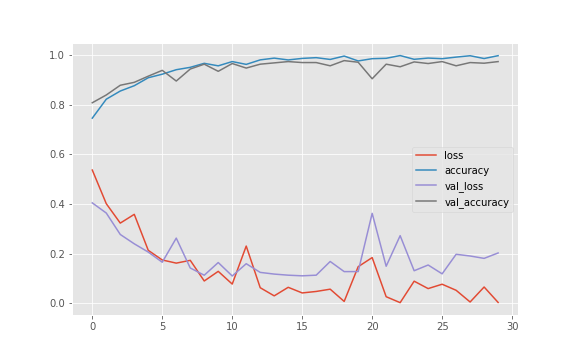

In [131]:
history.params # The model parameters

{'verbose': 1, 'epochs': 30, 'steps': 40}

## c2. Model 2 Metric Testing with Test Dataset

In [49]:
model_2  = keras.models.load_model('model_2.h5')

In [38]:
model_2.layers # Model layers list

In [51]:
model_2.summary() # This is the summary of model 2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0

In [52]:
test_dataset.reset() # resetting the test dataset 

In [50]:
model_2.metrics_names # this are the model metrics as we already know

['loss', 'accuracy']

In [53]:
metrics_test_testing_2 = model_2.evaluate(test_dataset)     # evaluating the metrics on the test dataset

16/16 [==============================] - 67s 4s/step - loss: 0.0523 - accuracy: 0.9824


In [54]:
metrics_test_testing_2  # This is the loss and accuracy of the model ont he test dataset

[0.052319761365652084, 0.982375979423523]

## c3. Model 2 Confusion Matrix and Classification Report

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model_2.predict(test_dataset)
y_pred = [1 * (x[0]>=0.5) for x in Y_pred]
conf_mtx = confusion_matrix(test_dataset.classes, y_pred)
print(conf_mtx)
print('Classification Report')
target_names = ['Not_acceptable', 'Acceptable']
print(classification_report(test_dataset.classes, y_pred, 
target_names=target_names))

[[883  18]
 [  9 622]]
Classification Report
                precision    recall  f1-score   support

Not_acceptable       0.99      0.98      0.98       901
    Acceptable       0.97      0.99      0.98       631

      accuracy                           0.98      1532
     macro avg       0.98      0.98      0.98      1532
  weighted avg       0.98      0.98      0.98      1532



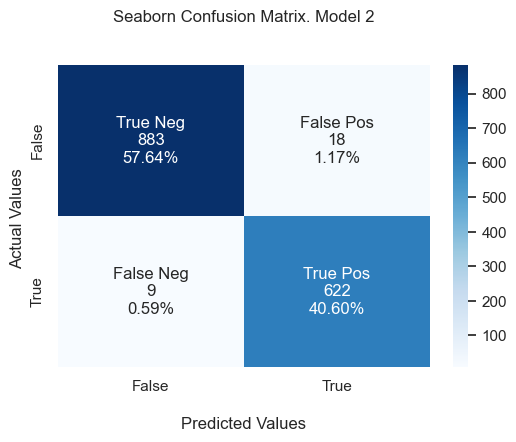

In [56]:
# Plotting the confussion matrix 
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mtx.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mtx.flatten()/np.sum(conf_mtx)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mtx, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix. Model 2\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# labels 
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

Acceptable: 901 images  
Not_Acceptable: 631 images  
Total Images: 1532  
  
Accuracy: How often is the classifier correct?  
- (TP+TN)/total = (622+883)/1532 = 0.98 (98%)
  
Misclassification Rate: How often is it wrong?  
- (FP+FN)/total = (18+9)/1532 = 0.18 (1.8%)   
- equivalent to 1 minus Accuracy  
- also known as "Error Rate"  
  
True Positive Rate: When it's actually yes, how often does it predict yes?  
- TP/actual yes = 622/631 = 0.985 (99%)  
- also known as "Sensitivity" or "Recall"  
  
False Positive Rate: When it's actually no, how often does it predict yes?  
- FP/actual no = 18/883 = 0.020 (2%)  
  
True Negative Rate: When it's actually no, how often does it predict no?  
- TN/actual no = 883/901 = 0.98 (98%)  
- equivalent to 1 minus False Positive Rate  
- also known as "Specificity"  
  
Precision: When it predicts yes, how often is it correct?  
- TP/predicted yes = 622/640 = 0.97 (97%)  
  
Prevalence: How often does the yes condition actually occur in our sample?  
- actual yes/total = 631/1532 = 0.41 (41%)  
  
[Data School] (https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

# d. Model 3 

## d1. Adding Regularization and Dropout. Using Callbacks Checkpoints and Early Stopping

Please note I have renamed the models for the report and they have been separated into Model 1, 2 and model (final model), and this is not reflected in the model names used int the cells below

In [25]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape =(512,512,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ###
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ###
                                    tf.keras.layers.Conv2D(64, (3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ###                                   
                                    tf.keras.layers.Conv2D(128, (3,3),activation = 'relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)), # added regularization
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout( 0.2), # adding dropout
                                    ###
                                    tf.keras.layers.Conv2D(320, (3,3),activation = 'relu', kernel_regularizer =tf.keras.regularizers.l2( l=0.01)), # added regularization
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Dropout( 0.2), # adding dropout
                                    ###
                                    tf.keras.layers.Flatten(),
                                    ###
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ###
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                                   ])

In [32]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
             metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint("model.h5", monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

es = keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

history = model.fit(train_dataset,
                     steps_per_epoch = 40, 
                     epochs = 50,
                     validation_data = validation_dataset, callbacks = [checkpoint_cb, es])

model = keras.models.load_model("model.h5") # save the best model, overwritting the second one, named also model.h5

Epoch 1/50
40/40 [==============================] - ETA: 0s - loss: 1.9102 - accuracy: 0.6118 
Epoch 1: val_accuracy improved from -inf to 0.72858, saving model to model.h5
40/40 [==============================] - 647s 16s/step - loss: 1.9102 - accuracy: 0.6118 - val_loss: 1.0680 - val_accuracy: 0.7286
Epoch 2/50
40/40 [==============================] - ETA: 0s - loss: 0.8511 - accuracy: 0.7277 
Epoch 2: val_accuracy improved from 0.72858 to 0.75670, saving model to model.h5
40/40 [==============================] - 656s 16s/step - loss: 0.8511 - accuracy: 0.7277 - val_loss: 0.6532 - val_accuracy: 0.7567
Epoch 3/50
40/40 [==============================] - ETA: 0s - loss: 0.5651 - accuracy: 0.7763 
Epoch 3: val_accuracy improved from 0.75670 to 0.80183, saving model to model.h5
40/40 [==============================] - 611s 15s/step - loss: 0.5651 - accuracy: 0.7763 - val_loss: 0.4690 - val_accuracy: 0.8018
Epoch 4/50
40/40 [==============================] - ETA: 0s - loss: 0.4539 - accur

In [33]:
# model.save('model.h5') # saving the final model

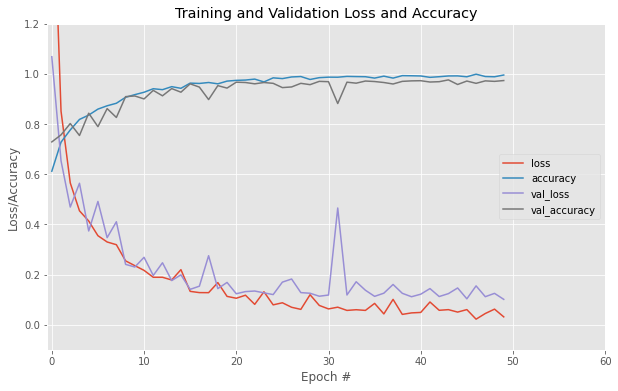

In [52]:
# Plotting the model metrics 
plt.style.use("ggplot")
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.savefig("final_model")
plt.title("Training and Validation Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.axis([-0.5, 60, -0.1, 1.2])
plt.show()

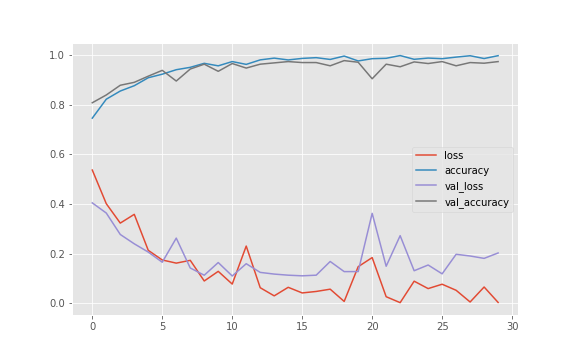

In [60]:
model = keras.models.load_model('model.h5') # to load the model back in

In [34]:
model.metrics_names # this are the model metrics as we already know

['loss', 'accuracy']

In [53]:
model.summary() # This is the summary of the CNN model 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 510, 510, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 255, 255, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 253, 253, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 126, 126, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 64)      

In [38]:
model.layers # Model layers list

In [54]:
history.params # The model parameters

{'verbose': 1, 'epochs': 50, 'steps': 40}

## d2. Final Model Metric Testing with Test Dataset

In [72]:
test_dataset.reset() 

In [69]:
model.metrics_names  # Model metrics

['loss', 'accuracy']

In [59]:
metrics_test_testing = model.evaluate(test_dataset)     # evaluating the metrics on the test dataset

16/16 [==============================] - 63s 4s/step - loss: 0.0741 - accuracy: 0.9817


In [60]:
metrics_test_testing  # This is the loss and accuracy of the model ont the test dataset

[0.0740770548582077, 0.9817232489585876]

## d3. Model 3 Confusion matrix and classification report

In [66]:
test_dataset.class_indices

{'Acceptable_JPEG': 0, 'Not_Acceptable_JPEG': 1}

In [63]:
import itertools
from sklearn.metrics import (f1_score, precision_score, recall_score)
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('always')  # "error", "ignore"

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(test_dataset)
y_pred = [1 * (x[0]>=0.5) for x in Y_pred]
conf_mtx = confusion_matrix(test_dataset.classes, y_pred)
print(conf_mtx)
print('Classification Report')
target_names = ['Not_acceptable', 'Acceptable']
print(classification_report(test_dataset.classes, y_pred, target_names=target_names))

[[888  13]
 [ 15 616]]
Classification Report
                precision    recall  f1-score   support

Not_acceptable       0.98      0.99      0.98       901
    Acceptable       0.98      0.98      0.98       631

      accuracy                           0.98      1532
     macro avg       0.98      0.98      0.98      1532
  weighted avg       0.98      0.98      0.98      1532



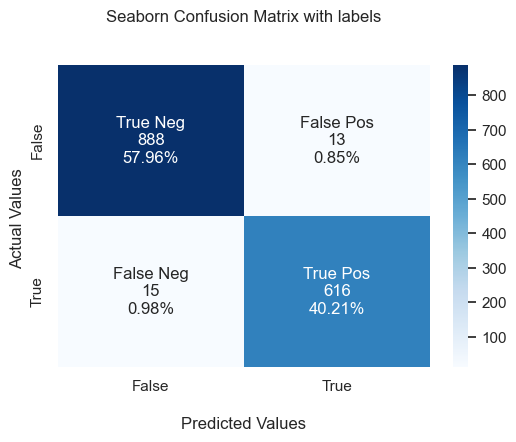

In [83]:
# Plotting the confussion matrix 
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mtx.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mtx.flatten()/np.sum(conf_mtx)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_mtx, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# labels 
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

Acceptable: 901 images  
Not_Acceptable: 631 images  
Total Images: 1532  
  
Accuracy: How often is the classifier correct?  
- (TP+TN)/total = (616+888)/1532 = 0.98 (98%)
  
Misclassification Rate: How often is it wrong?  
- (FP+FN)/total = (18+9)/1532 = 0.18 (1.8%)   
- equivalent to 1 minus Accuracy  
- also known as "Error Rate"  
  
True Positive Rate: When it's actually yes, how often does it predict yes?  
- TP/actual yes = 616/631 = 0.976 (98%)  
- also known as "Sensitivity" or "Recall"  
  
False Positive Rate: When it's actually no, how often does it predict yes?  
- FP/actual no = 13/901 = 0.014 (1.4%)  
  
True Negative Rate: When it's actually no, how often does it predict no?  
- TN/actual no = 888/901 = 0.99 (99%)  
- equivalent to 1 minus False Positive Rate  
- also known as "Specificity"  
  
Precision: When it predicts yes, how often is it correct?  
- TP/predicted yes = 616/629 = 0.98 (98%)  
  
Prevalence: How often does the yes condition actually occur in our sample?  
- actual yes/total = 631/1532 = 0.41 (41%)  
  
[Data School] (https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

## e. Predicting on New Knee Dataset and Preparing for Flask App

In [3]:
# Loading the model
model = keras.models.load_model('model.h5') # to load the model back in

In [4]:
dir_path = 'New_knee_jpeg/test/Not_acceptable'   # Let's predict on unseen data
for i in os.listdir(dir_path):  
    print(i)

IM-0003-0001.jpg
IM-0003-0002.jpg
IM-0003-0003.jpg
IM-0003-0004.jpg
IM-0003-0005.jpg
IM-0003-0006.jpg
IM-0003-0007.jpg
IM-0003-0008.jpg
IM-0003-0009.jpg
IM-0003-0010.jpg
IM-0003-0011.jpg
IM-0003-0012.jpg
IM-0003-0013.jpg
IM-0003-0014.jpg
IM-0003-0015.jpg
IM-0003-0016.jpg
IM-0003-0017.jpg
IM-0003-0018.jpg
IM-0003-0019.jpg
IM-0003-0020.jpg
IM-0003-0021.jpg
IM-0003-0022.jpg
IM-0003-0023.jpg
IM-0003-0024.jpg
IM-0003-0025.jpg


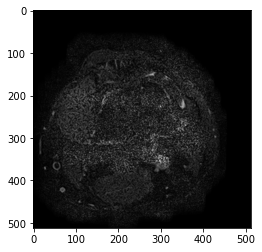

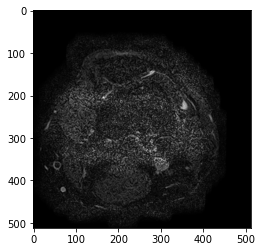

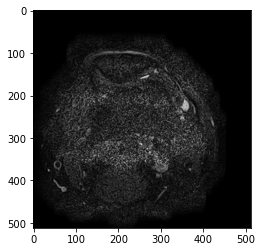

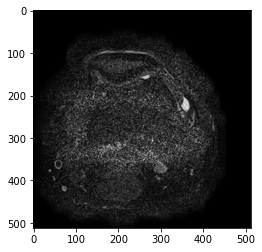

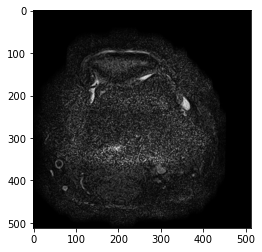

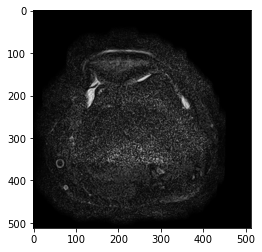

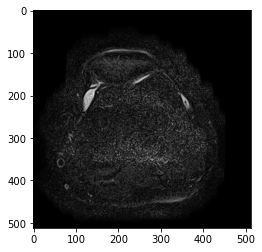

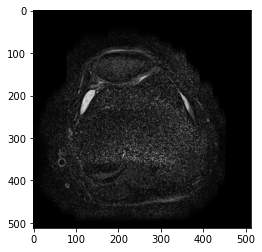

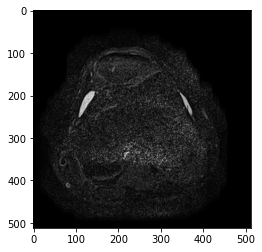

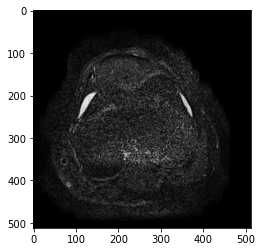

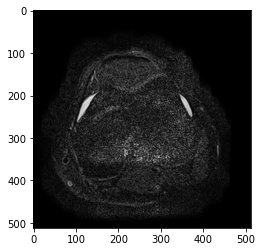

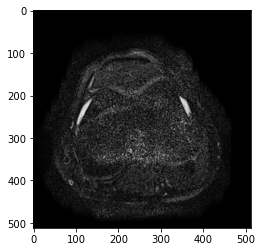

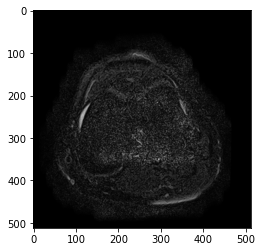

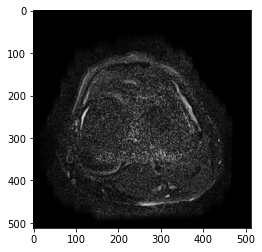

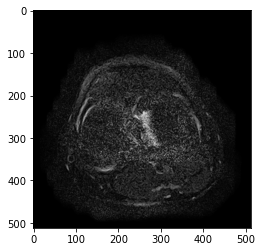

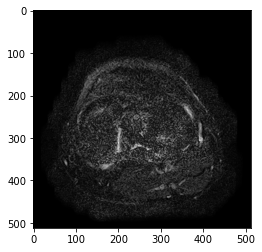

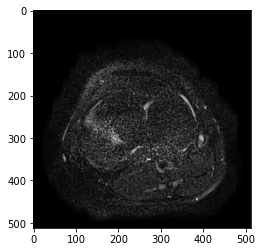

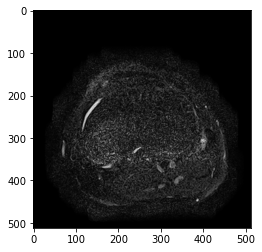

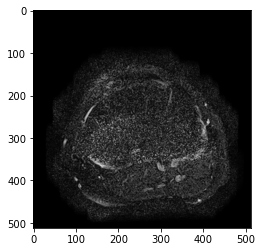

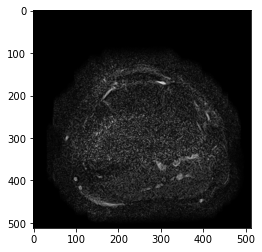

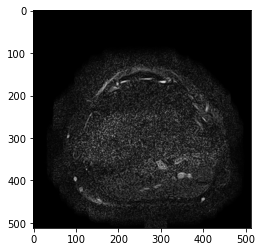

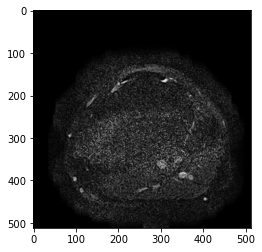

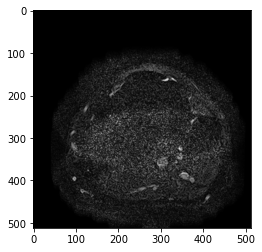

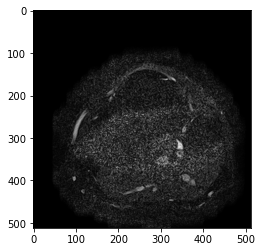

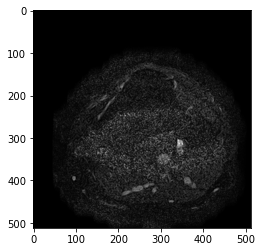

In [5]:
# Visualizing the data      
# Visualizing the data in the folder
for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'//'+ i)
    plt.imshow(img)
    plt.show()

## e1. Predicting on the data

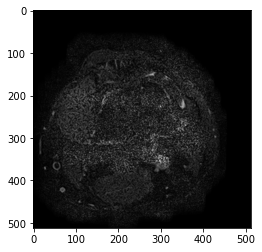

IM-0003-0001.jpg Not acceptable


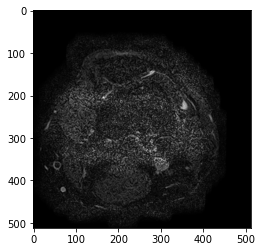

IM-0003-0002.jpg Not acceptable


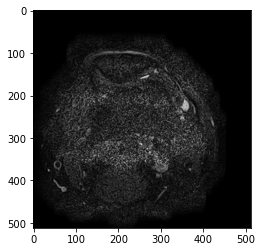

IM-0003-0003.jpg Not acceptable


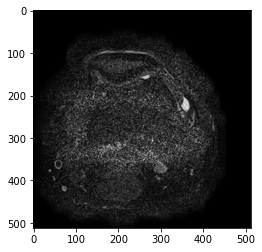

IM-0003-0004.jpg Not acceptable


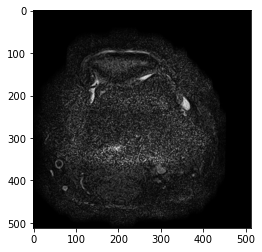

IM-0003-0005.jpg Not acceptable


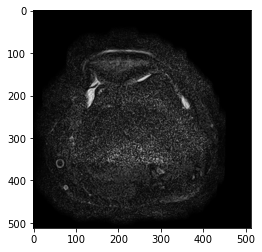

IM-0003-0006.jpg Not acceptable


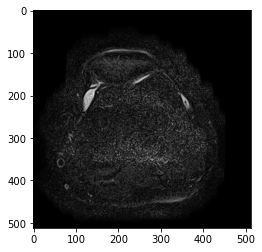

IM-0003-0007.jpg Not acceptable


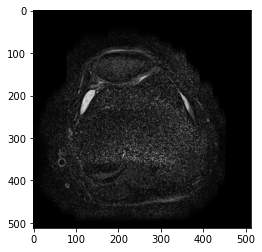

IM-0003-0008.jpg Not acceptable


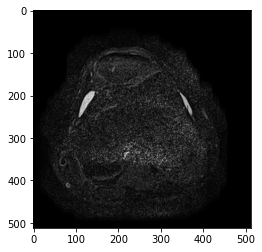

IM-0003-0009.jpg Not acceptable


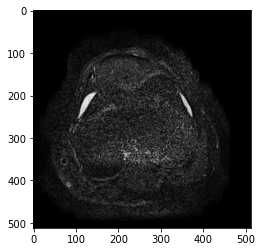

IM-0003-0010.jpg Not acceptable


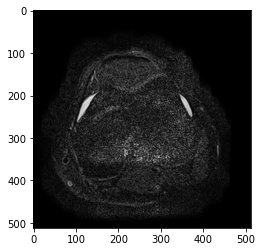

IM-0003-0011.jpg Not acceptable


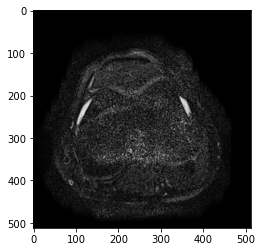

IM-0003-0012.jpg Not acceptable


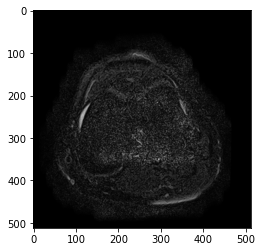

IM-0003-0013.jpg Not acceptable


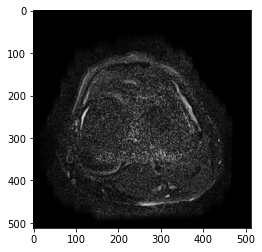

IM-0003-0014.jpg Not acceptable


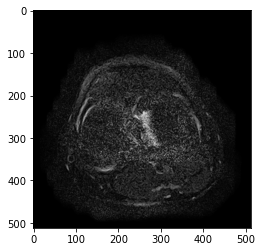

IM-0003-0015.jpg Not acceptable


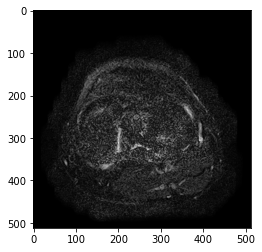

IM-0003-0016.jpg Not acceptable


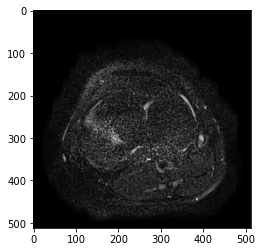

IM-0003-0017.jpg Not acceptable


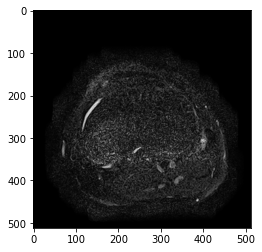

IM-0003-0018.jpg Not acceptable


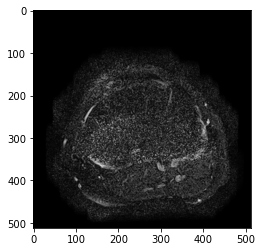

IM-0003-0019.jpg Not acceptable


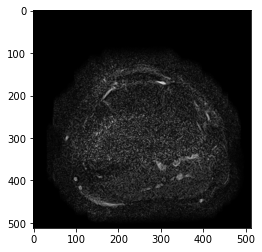

IM-0003-0020.jpg Not acceptable


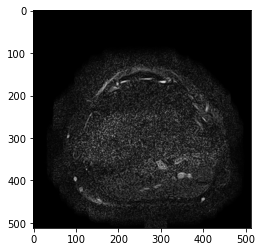

IM-0003-0021.jpg Not acceptable


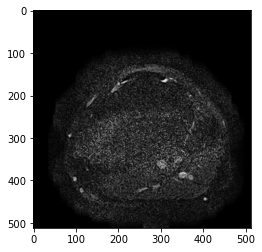

IM-0003-0022.jpg Not acceptable


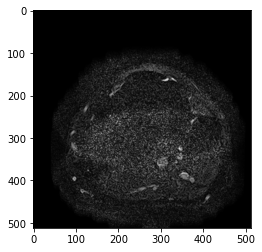

IM-0003-0023.jpg Not acceptable


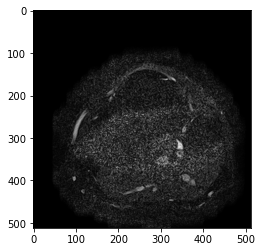

IM-0003-0024.jpg Not acceptable


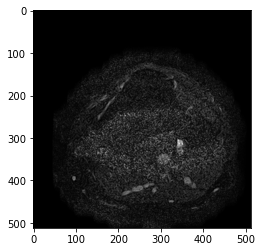

IM-0003-0025.jpg Not acceptable


In [6]:
for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'//'+ i, target_size = (512,512) )
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print(i, 'Acceptable')
    else:
        print(i, 'Not acceptable')

## e2. Preparing for web app flask deployment

In [10]:
#new_dir = ('New_knee_jpeg/test/Not_acceptable/bad_IM-0002-0025.jpeg')
new_dir = ('New_knee_jpeg/test/Acceptable/IM-0002-0015.jpg')

In [11]:
def predict_label(new_dir):    
    img = image.load_img(new_dir , target_size = (512,512))    
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis = 0)
    images = np.vstack([img])
    p = model.predict(images) 
    a = 'acceptable'
    b = 'not acceptable'
    if p == 0:        
        return print (a, p)        
    else:        
        return print (b, p)  

In [12]:
new_pred = predict_label(new_dir)

acceptable [[0.]]


In [17]:
test_dataset.class_indices

{'Acceptable_JPEG': 0, 'Not_Acceptable_JPEG': 1}

### f. Trying Other Body Regions 

In [18]:
dir_path = 'Other_body_regions'   # Let's predict on unseen data
for i in os.listdir(dir_path):  
    print(i)

bad_IM-0001-0016.jpg
bad_IM-0015-0006.jpg
bad_IM-0017-0006.jpg
bad_IM-0032-0003.jpg
good_IM-0003-0014.jpg
good_IM-0006-0017.jpg


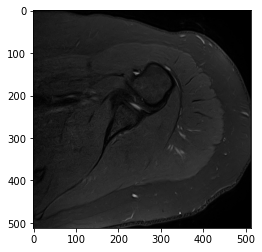

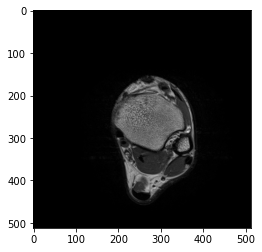

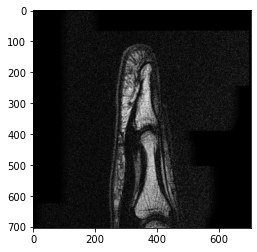

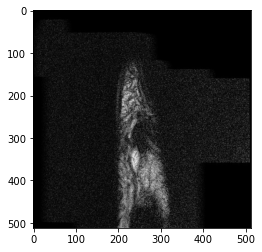

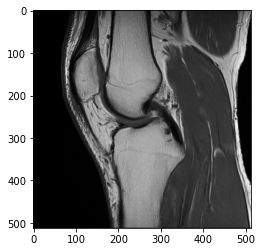

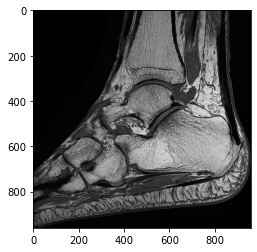

In [19]:
# Visualizing the data      
# Visualizing the data in the folder
for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'//'+ i)
    plt.imshow(img)
    plt.grid(False)
    plt.show()

## Predicting on the data

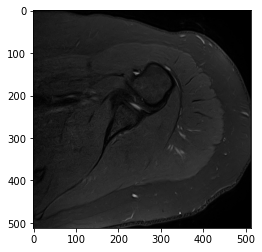

bad_IM-0001-0016.jpg Acceptable


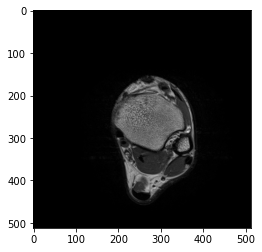

bad_IM-0015-0006.jpg Not acceptable


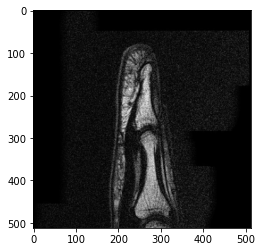

bad_IM-0017-0006.jpg Not acceptable


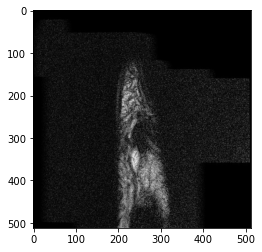

bad_IM-0032-0003.jpg Not acceptable


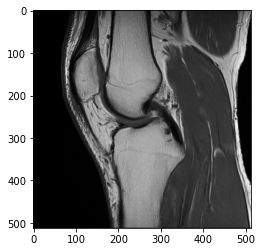

good_IM-0003-0014.jpg Acceptable


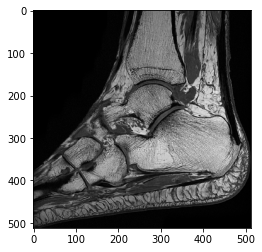

good_IM-0006-0017.jpg Acceptable


In [20]:
for i in os.listdir(dir_path):
    img = image.load_img(dir_path +'//'+ i, target_size = (512,512) )
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print(i, 'Acceptable')
    else:
        print(i, 'Not acceptable')